In [1]:
from __future__ import division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sleep_data_mass import SleepDataMASS

/home/ntapia/miniconda3/envs/idp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Get some signal
dataset = SleepDataMASS(load_from_checkpoint=True)
data_train = dataset.get_subset("train")
train_feats, train_labels = dataset.get_augmented_numpy_subset("train", 1, 1)


Loading MASS from checkpoint

Pages in train set: 5838
Pages in val set: 1952
Pages in test set: 3011

Pages in MASS dataset: 10801


In [3]:
print(data_train[0]["pages"].shape[0])
print(data_train[1]["pages"].shape[0])

print(data_train[1]["reg_id"])

print(train_feats.shape, train_labels.shape)

694
730
14
(5838, 8400) (5838, 8400)


Single signal extracted: (4000,) (4000,)


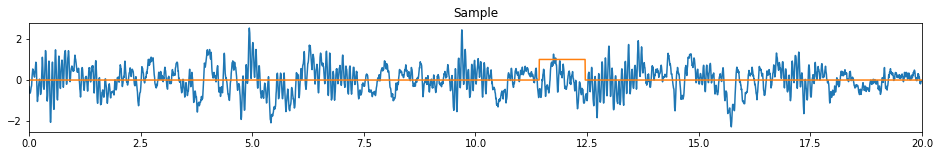

In [4]:
choose_page = 1200  # 506 of register "1" of train, which is register 14.

signal = train_feats[choose_page, 2200:-2200]
marks = train_labels[choose_page, 2200:-2200]
print("Single signal extracted:", signal.shape, marks.shape)

# Show signal
plt.figure(figsize=(16, 2))
time_axis = np.arange(0, signal.shape[0]/200, 1/200)
plt.plot(time_axis, signal)
plt.plot(time_axis, marks)
plt.title('Sample')
plt.xlim([time_axis[0], time_axis[-1]])
plt.show()

Page: 961


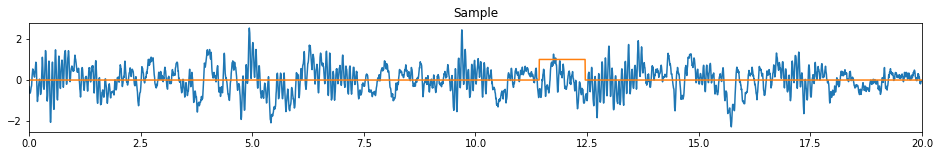

In [5]:
signal_14 = data_train[1]["signal"]
marks_14 = data_train[1]["marks_1"]
pages_14 = data_train[1]["pages"]

choose_page = 506

page = pages_14[choose_page]
print("Page:", page)
start_sample = page*200*20
end_sample = (page+1)*200*20

page_signal = signal_14[start_sample:end_sample]
page_marks = marks_14[start_sample:end_sample]

# Show signal
plt.figure(figsize=(16, 2))
time_axis = np.arange(0, page_signal.shape[0]/200, 1/200)
plt.plot(time_axis, page_signal)
plt.plot(time_axis, page_marks)
plt.title('Sample')
plt.xlim([time_axis[0], time_axis[-1]])
plt.show()

In [ ]:
import pyedflib
import utils

fs = 256

channel = 13  # C3 in 13, F3 in 22
path_eeg_file = "ssdata_mass/register/01-02-0014 PSG.edf"
path_states_file = "ssdata_mass/label/states/01-02-0014 Base.edf"
path_marks_file = "ssdata_mass/label/marks/e1/01-02-0014 SpindleE1.edf"

file = pyedflib.EdfReader(path_eeg_file)
signal = file.readSignal(channel)
fs_old = file.getSampleFrequency(channel)
file._close()
del file

file = pyedflib.EdfReader(path_marks_file)
annotations = file.readAnnotations()
file._close()
del file
onsets = np.array(annotations[0])
durations = np.array(annotations[1])
offsets = onsets + durations
# Translate to a sample step:
start_samples = np.array(np.round(onsets * fs), dtype=np.int32)
end_samples = np.array(np.round(offsets * fs), dtype=np.int32)
marks = np.stack((start_samples, end_samples), axis=1)
#return marks

# Resample
#gcd_freqs = math.gcd(self.fs, fs_old)
#up = int(self.fs / gcd_freqs)
#down = int(fs_old / gcd_freqs)
#signal = sp_signal.resample_poly(signal, up, down)
#signal = np.array(signal, dtype=np.float32)
#return signal

In [ ]:
print(signal.shape)
print(fs_old)
print(marks.shape)
marks_01 = utils.inter2seq(marks, 0, signal.shape[0] - 1)
print(marks_01.shape)

page = 961
fs = 256

start_sample = int(page*fs*20)
end_sample = int((page+1)*fs*20)

print("Start sample: ", start_sample)
print("End sample: ", end_sample)

start_time = page*20
end_time = (page+1)*20

print("Start time: ", start_time)
print("End time: ", end_time)

# Annotations
useful_marks = marks[(marks[:,0]>start_time*fs) & (marks[:,0]<end_time*fs)]
print(useful_marks)
print(useful_marks/fs)

page_signal = signal[start_sample:end_sample]
page_marks = marks_01[start_sample:end_sample]

# Show signal
plt.figure(figsize=(16, 2))
time_axis = np.arange(start_time, end_time, 1/256)
plt.plot(time_axis, page_signal)
plt.plot(time_axis, 20*page_marks)
plt.title('Sample')
plt.xlim([time_axis[0], time_axis[-1]])
plt.show()



In [45]:
import pyedflib
import utils


regs = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
         '13', '14', '15', '16', '17', '18', '19']
for reg in ['14']:
    #print("Register ",reg)
    fs = 256
    channel = 13  # C3 in 13, F3 in 22
    path_eeg_file = "ssdata_mass/register/01-02-00"+reg+" PSG.edf"
    #path_states_file = "ssdata_mass/label/states/01-02-0014 Base.edf"
    #path_marks_file = "ssdata_mass/label/marks/e1/01-02-0014 SpindleE1.edf"
    f = pyedflib.EdfReader(path_eeg_file)
    signal = f.readSignal(channel)
    #annotations = f.readAnnotations()
    print("File duration: %i seconds" % f.file_duration)
    #print("recording_additional: %s" % f.getRecordingAdditional())
    #print("datarecord duration: %f seconds" % f.getFileDuration())
    #print("number of datarecords in the file: %i" % f.datarecords_in_file)
    #print("number of annotations in the file: %i" % f.annotations_in_file)
    #print("samples in file: %i" % f.getNSamples()[channel])
    #fs_old = f.getSampleFrequency(channel)
    #print("physical maximum: %f" % f.getPhysicalMaximum(channel))
    #print("physical minimum: %f" % f.getPhysicalMinimum(channel))
    #print("digital maximum: %i" % f.getDigitalMaximum(channel))
    #print("digital minimum: %i" % f.getDigitalMinimum(channel))
    #print("physical dimension: %s" % f.getPhysicalDimension(channel))
    #print("prefilter: %s" % f.getPrefilter(channel))
    #print("transducer: %s" % f.getTransducer(channel))
    #print("samplefrequency: %f" % f.getSampleFrequency(channel))
    #print("Signal length:",signal.shape[0])
    #print("Assuming 256Hz: duration:", signal.shape[0]/(256))
    print("Reg"+reg+". Sampling frequency for marks annotations:", signal.shape[0]/f.file_duration)
    print("")

    f._close()
    del f

File duration: 28176 seconds
Reg14. Sampling frequency for marks annotations: 256.0181714934696



In [48]:
path_marks_file = "ssdata_mass/label/marks/e1/01-02-0014 SpindleE1.edf"
f = pyedflib.EdfReader(path_marks_file)
annotations = f.readAnnotations()

print("edfsignals: %i" % f.signals_in_file)
print("file duration: %i seconds" % f.file_duration)
print("startdate: %i-%i-%i" % (f.getStartdatetime().day,f.getStartdatetime().month,f.getStartdatetime().year))
print("starttime: %i:%02i:%02i" % (f.getStartdatetime().hour,f.getStartdatetime().minute,f.getStartdatetime().second))
# print("patient: %s" % f.getP);
# print("recording: %s" % f.getPatientAdditional())
print("patientcode: %s" % f.getPatientCode())
print("gender: %s" % f.getGender())
print("birthdate: %s" % f.getBirthdate())
print("patient_name: %s" % f.getPatientName())
print("patient_additional: %s" % f.getPatientAdditional())
print("admincode: %s" % f.getAdmincode())
print("technician: %s" % f.getTechnician())
print("equipment: %s" % f.getEquipment())
print("recording_additional: %s" % f.getRecordingAdditional())
print("datarecord duration: %f seconds" % f.getFileDuration())
print("number of datarecords in the file: %i" % f.datarecords_in_file)
print("number of annotations in the file: %i" % f.annotations_in_file)


#file.getSampleFrequency(channel)
f._close()
del f

edfsignals: 0
file duration: 28176 seconds
startdate: 1-1-2000
starttime: 23:15:18
patientcode: 
gender: 
birthdate: 
patient_name: X
patient_additional: 
admincode: 
technician: 
equipment: 
recording_additional: 
datarecord duration: 28176.000000 seconds
number of datarecords in the file: 14089
number of annotations in the file: 713
